In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from src.preprocess import stratify5
from src.aggregate_features import generate_GC_features
from src.read_data import load_reference_data2

#read GC data
df = pd.read_csv('./data/derived/cg_bias/hiv_cg_bias.csv')
ratio = pd.read_csv('./data/derived/cg_bias/hiv_gc_ratio.csv')

In [2]:
_, _, gag, pol, gp120, gp41 = load_reference_data2('./data/') #load key gene region coordinates

In [3]:
GC_features = generate_GC_features(ratio, gag, pol, gp120, gp41) #aggregate by gene regions
GC_features = stratify5(GC_features) #add column for 5-classes 

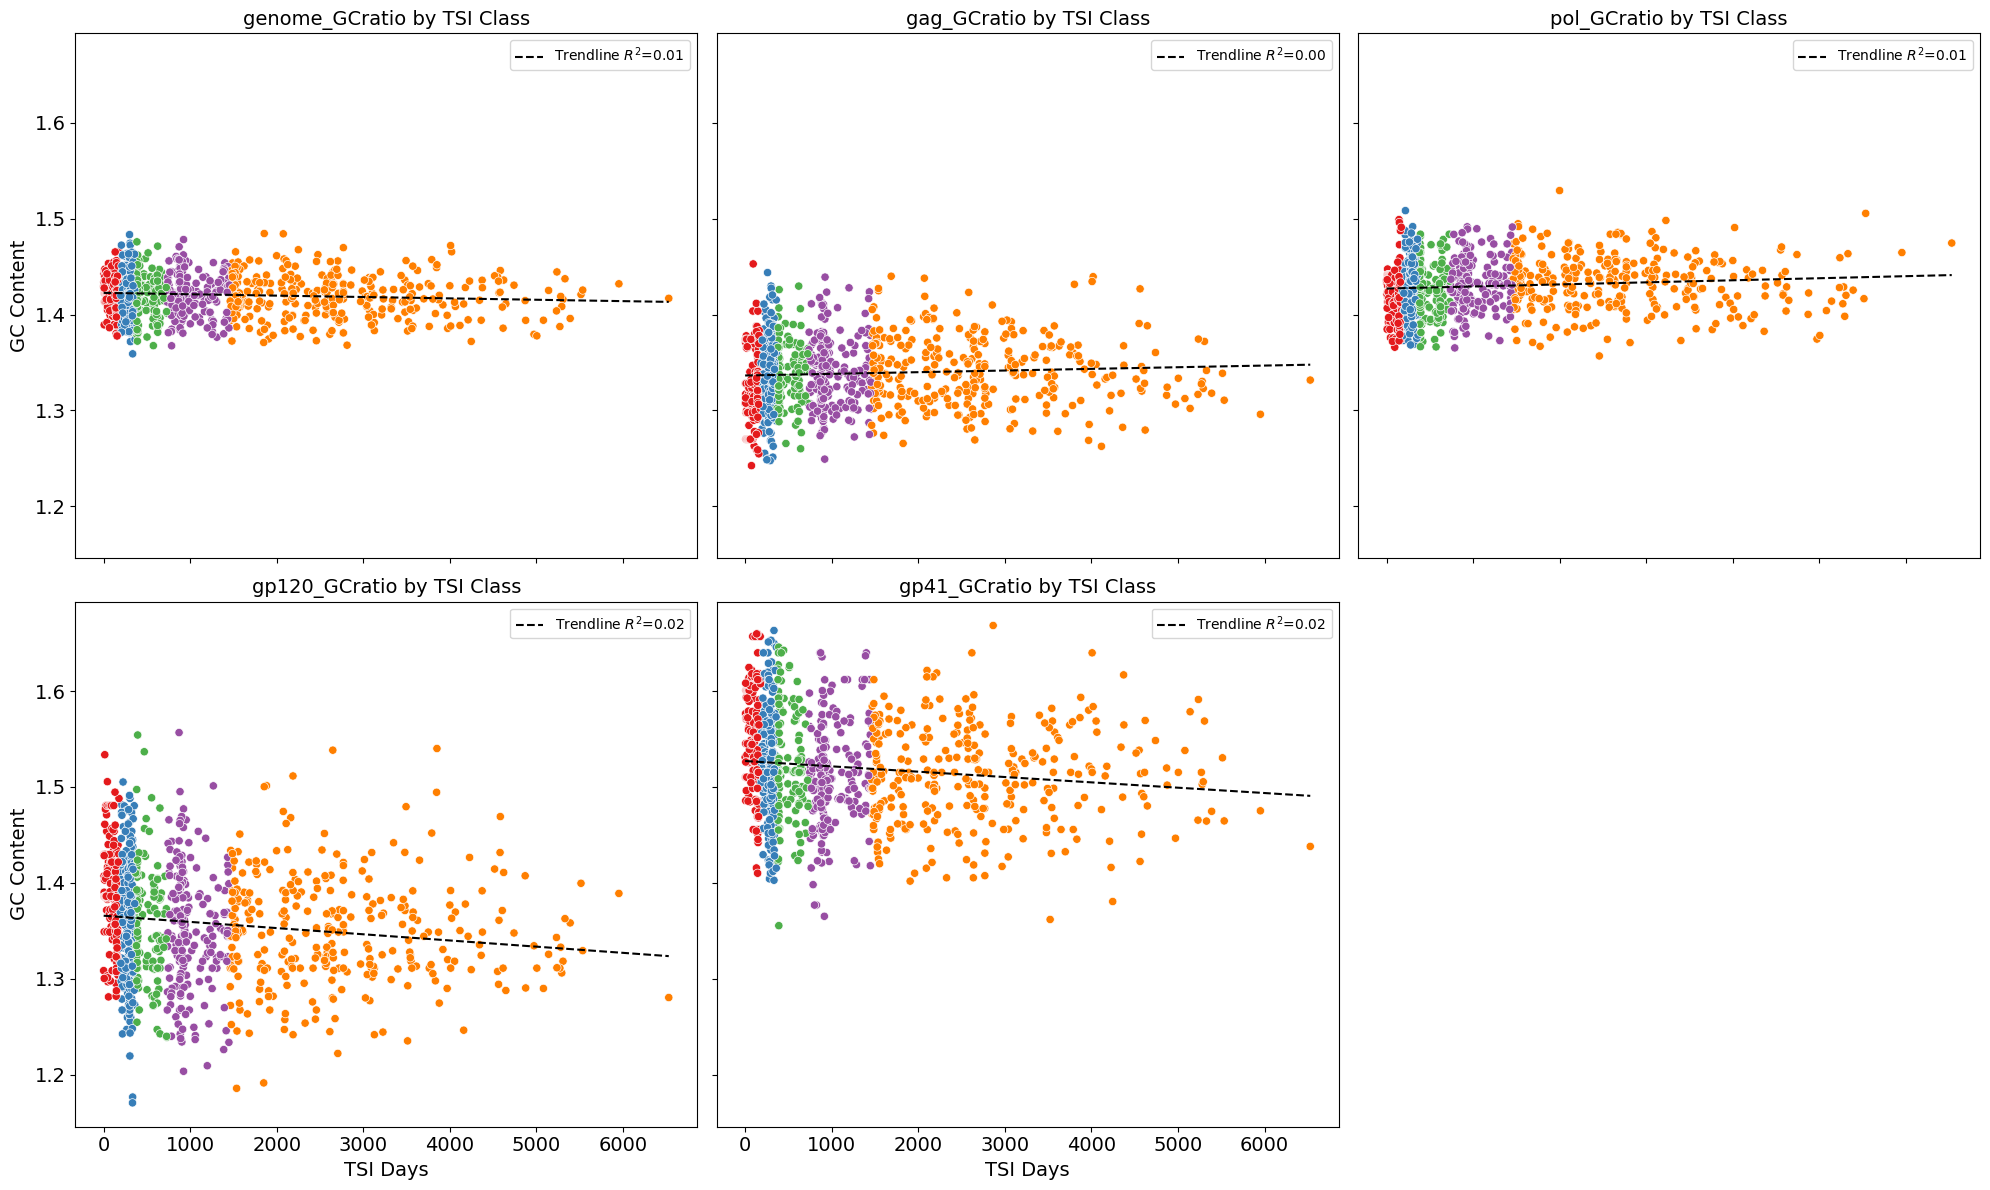

In [10]:
#list of features to plot
features = ["genome_GCratio", "gag_GCratio", "pol_GCratio", "gp120_GCratio", "gp41_GCratio"]
n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows), sharex=True, sharey=True)
axes = axes.flatten()

# Plot all features against TSI 
for i, feature in enumerate(features):
    ax = axes[i]
    sns.scatterplot(ax=ax, data=GC_features, x='TSI_days', y=feature, hue='TSI_category', palette='Set1', legend=False)
    ax.set_title(f'{feature} by TSI Class', size = 14)
    ax.set_xlabel('TSI Days', size = 14)
    ax.set_ylabel('GC Content', size = 14)
    ax.tick_params(axis='both', which='major', labelsize=14)
    # Fit a linear regression
    subset = GC_features.dropna(subset=[feature, 'TSI_days'])
    X = subset[['TSI_days']]
    y = subset[feature]
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred) #compute r2
    # Add trendline
    sns.lineplot(ax=ax, x=subset['TSI_days'], y=y_pred, color='black', label=f'Trendline $R^2$={r2:.2f}', linestyle='--')
    
    ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('./outputs/features/gc_corr.pdf')
plt.show()